# Dataset description and validations
## The dataset

The dataset is part of a NLP (_Natural Language Problem_) and is stored in a sqlite database file. The dataset is contained in the table __licitaciones__ and the important columns are **descripcion_filtrado_** which contains the text and **categoria** which contains the classes.

The dataset has 7 classes:
- "A": _Material Vivo Animal y Vegetal_.
- "B": _Materias Primas_.
- "C": _Maquinaria, Herramientas, Equipo Industrial y Vehículos_.
- "D": _Componentes y Suministros_.
- "E": _Productos de Uso Final_.
- "F": _Servicios_.
- "G": _Terrenos, Edificios, Estructuras y Vías_.

As you can already notice, the dataset is in Spanish. The data is part of the Colombian Government and the purpouse is to identify if a description corresponds to the given class.

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np

DATABASE_PATH = '../../database.db'
TEXT_COLUMN = 'descripcion_filtrado'
CLASS_COLUMN = 'categoria'
SQL_SENTENCE = 'SELECT %s, %s FROM licitaciones' % (TEXT_COLUMN, CLASS_COLUMN)
LENGUAGE = 'spanish'

conn = sqlite3.connect(DATABASE_PATH)
df = pd.read_sql(SQL_SENTENCE, conn)

print('The dataset has a total of %d samples' % len(df))
print('The dataset has a total of %d classes' % len(np.unique(df[CLASS_COLUMN])))

The dataset has a total of 26989 samples
The dataset has a total of 7 classes


## Explanation of the classes

First let's see if the distribution of the classes is balanced.

In [2]:
classes = df.groupby(CLASS_COLUMN).count()
classes['percentage'] = classes[TEXT_COLUMN] / sum(classes[TEXT_COLUMN]) * 100
classes

,descripcion_filtrado,percentage
categoria,,
A,205,0.759569
B,847,3.138316
C,687,2.545481
D,1175,4.353626
E,3736,13.842677
F,19919,73.804142
G,420,1.556190


Now let's look at the data in a count plot!

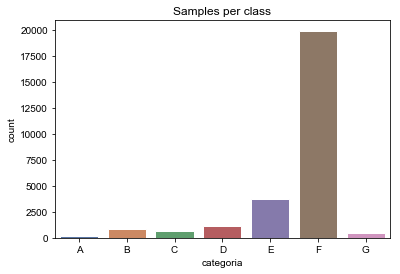

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Samples per class')
sns.set(style='darkgrid')
sns.countplot(x=CLASS_COLUMN, data=df)
plt.show()

## Explanation of the text

Let's check for information like the length of a sample, the mean of the samples length and all those statistics

In [4]:
df['words_count'] = df[TEXT_COLUMN].apply(lambda sample: len(sample.split()))
tuple_min_max_words = (df['words_count'].min(), df['words_count'].max())

df['words_count'].describe()

count    26989.000000
mean        29.353255
std         19.427403
min          1.000000
25%         17.000000
50%         25.000000
75%         37.000000
max        237.000000
Name: words_count, dtype: float64

Now let's look at it in a graphical way, it is always more fun!

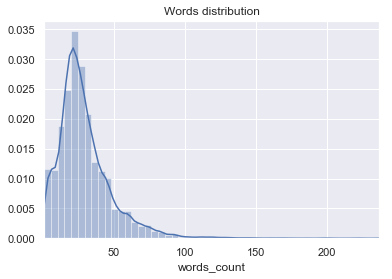

In [5]:
plt.title('Words distribution')
plt.xlim(tuple_min_max_words)
sns.distplot(df['words_count'])

And what about of the number of words per class? Prepare for it!

A:
       words_count
count   205.000000
mean     28.160976
std      16.674168
min       2.000000
25%      20.000000
50%      25.000000
75%      32.000000
max     141.000000


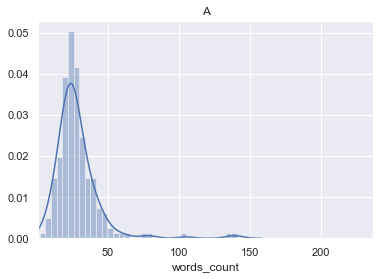

B:
       words_count
count   847.000000
mean     24.683589
std      13.480097
min       2.000000
25%      16.000000
50%      22.000000
75%      30.000000
max      94.000000


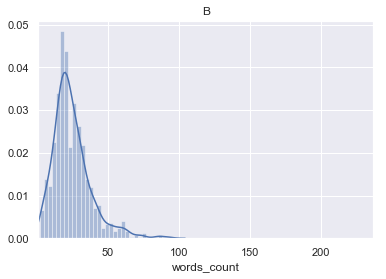

C:
       words_count
count   687.000000
mean     26.554585
std      14.485023
min       1.000000
25%      17.000000
50%      24.000000
75%      33.000000
max      97.000000


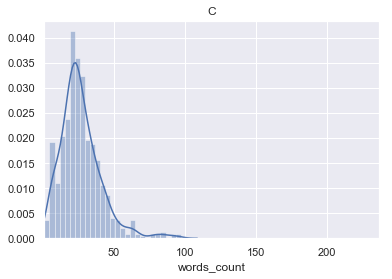

D:
       words_count
count  1175.000000
mean     24.125106
std      17.089568
min       1.000000
25%      15.000000
50%      21.000000
75%      30.000000
max     225.000000


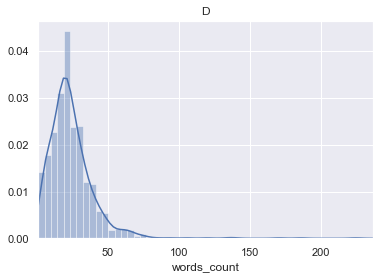

E:
       words_count
count  3736.000000
mean     23.528908
std      15.140970
min       1.000000
25%      15.000000
50%      21.000000
75%      29.000000
max     197.000000


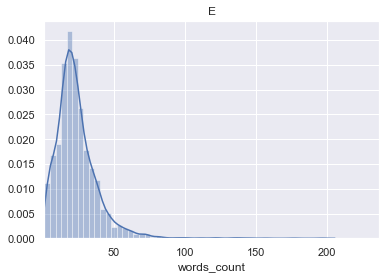

F:
        words_count
count  19919.000000
mean      31.014107
std       20.316282
min        1.000000
25%       18.000000
50%       27.000000
75%       39.000000
max      237.000000


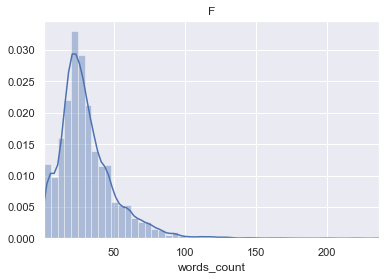

G:
       words_count
count   420.000000
mean     31.597619
std      20.212770
min       1.000000
25%      19.000000
50%      27.000000
75%      37.000000
max     199.000000


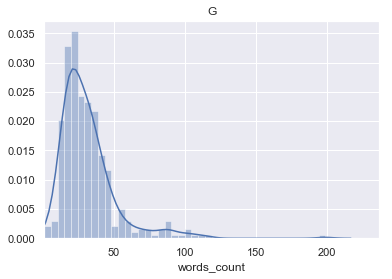

In [6]:
grouped_classes = df.groupby(CLASS_COLUMN)

for name, group in grouped_classes:
    plt.xlim(tuple_min_max_words)
    plt.title(name)
    sns.distplot(group['words_count'])
    print('%s:' % name)
    print(group.describe())
    plt.show()

And resuming everything in a boxplot...

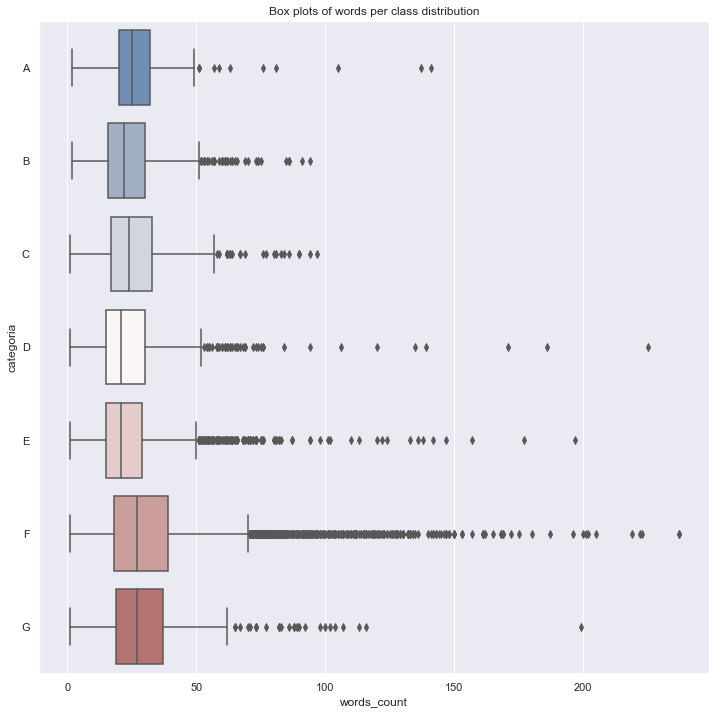

In [7]:
plt.figure(figsize=(12, 12))
plt.title('Box plots of words per class distribution')
sns.set(style='ticks')
sns.boxplot(x='words_count', y=CLASS_COLUMN, data=df, palette="vlag")

## Wordclouds are awesome

Wanna see what are the most used words in the dataset? Wordclouse are one of the best ways to see it. Just hold onto your sit and enjoy

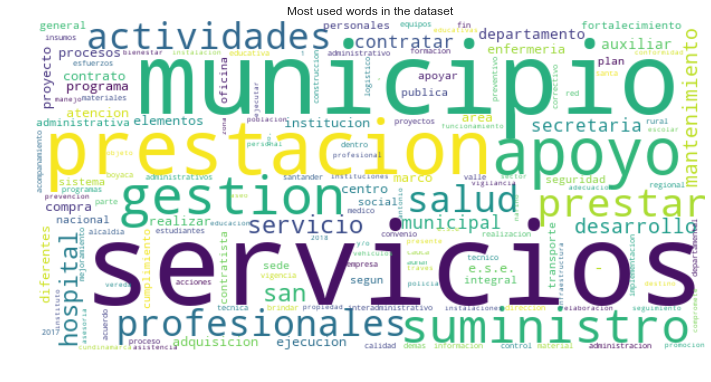

In [8]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import collections

stop_words = set(stopwords.words('spanish'))

def clean_sentence(sentences_list):
    text = ' '.join(sentences_list).casefold().split()
    whole_text_clean = list(filter(lambda word: word not in stop_words, text))
    return whole_text_clean
    
def obtain_frequencies_dict(text):
    frequencies = collections.Counter(text).most_common(200)
    labels = []
    values = []
    
    for label, value in frequencies:
        labels.append(label)
        values.append(value)
        
    return dict(zip(labels, values))

def show_wordcloud(frequencies_dict, title):
    plt.figure(figsize=(12, 12))
    plt.title(title)
    wordcloud = WordCloud(background_color='white', scale=1.5).generate_from_frequencies(frequencies_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
whole_text = clean_sentence(df[TEXT_COLUMN].values)
frequencies_dict = obtain_frequencies_dict(whole_text)
show_wordcloud(frequencies_dict, 'Most used words in the dataset')

I bet you want to see the wordclouds per class, don't you?

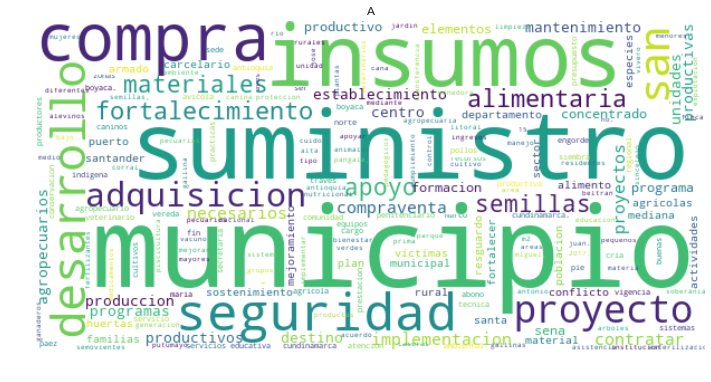

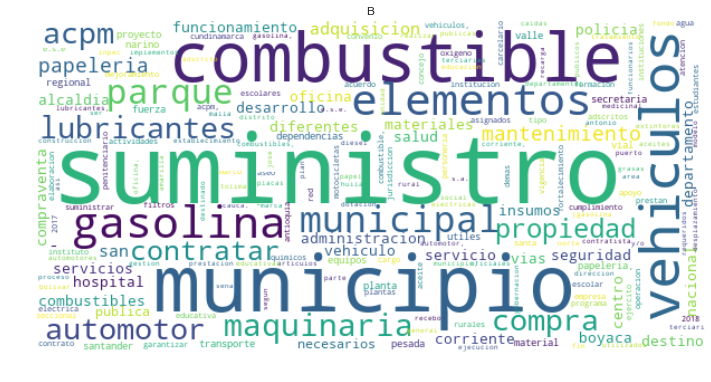

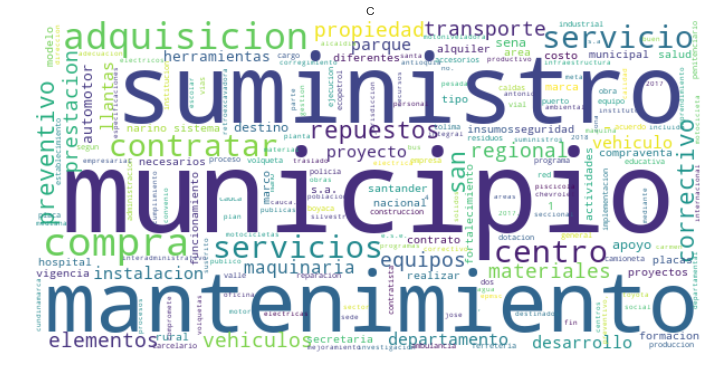

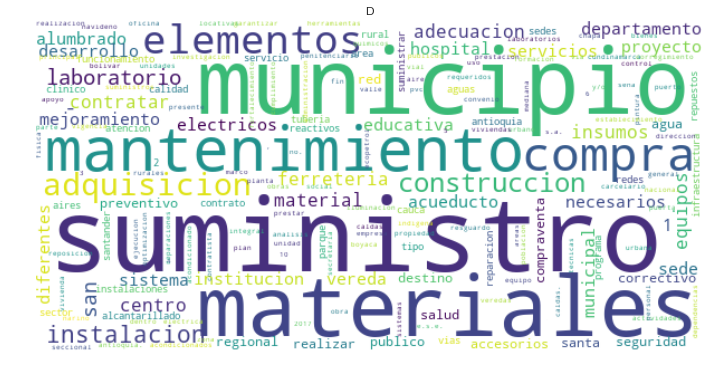

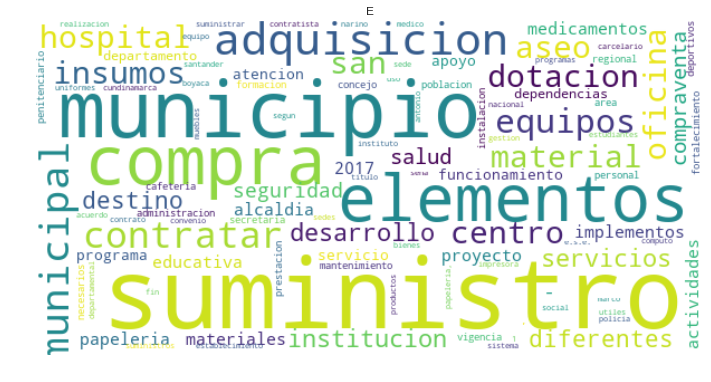

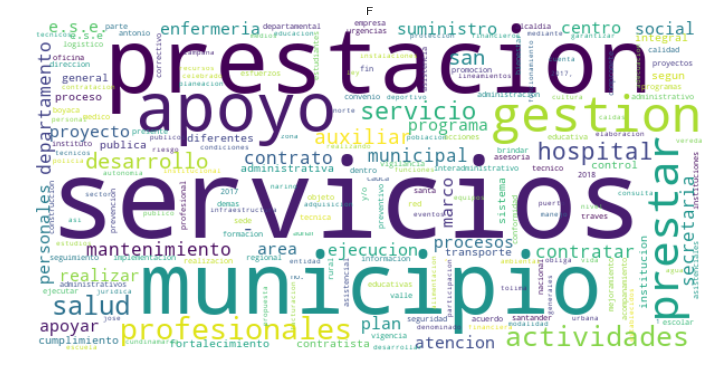

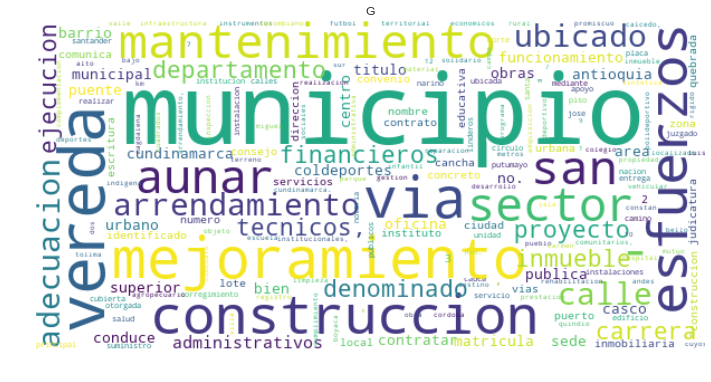

In [9]:
grouped_classes = df.groupby(CLASS_COLUMN)

for name, group in grouped_classes:
    whole_text = clean_sentence(group[TEXT_COLUMN].values)
    frequencies_dict = obtain_frequencies_dict(whole_text)
    show_wordcloud(frequencies_dict, name)